In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_DIR='../../data'

TRAIN_DATA=f'{DATA_DIR}/fraudTest.csv'
# TEST_DATA=f'{DATA_DIR}/fraudTrain.csv'

In [3]:
train_df = pd.read_csv(TRAIN_DATA)
# test_df = pd.read_csv(TEST_DATA)

## Dataset Overview


- **index**:    A unique identifier for each row in the dataset.
- **trans_date_trans_time**:    The date and time when the transaction took place.
- **cc_num**:   The credit card number associated with the transaction.
- **merchant**:   The name of the merchant where the transaction occurred.
- **category**:   The category or type of merchant where the transaction occurred.
- **amt**:    The amount of money involved in the transaction.
- **first**:    The first name of the credit card holder.
- **last**:   The last name of the credit card holder.
- **gender**:   The gender of the credit card holder.
- **street**:   The street address of the credit card holder.
- **city**:   The city where the credit card holder resides.
- **state**:    The state where the credit card holder resides.
- **zip**:    The zip code of the credit card holder's address.
- **lat**:    The latitude location of the credit card holder.
- **long**:   The longitude location of the credit card holder.
- **city_pop**:   The population of the city where the credit card holder resides.
- **job**:    The job title or occupation of the credit card holder.
- **dob**:    The date of birth of the credit card holder.
- **trans_num**:    A unique identifier for each transaction.
- **unix_time**:    The transaction time in UNIX timestamp format (seconds since January 1, 1970).
- **merch_lat**:    The latitude location of the merchant.
- **merch_long**:   The longitude location of the merchant.
- **is_fraud**:   A flag indicating whether the transaction is fraudulent. This is the target variable, where:
  - 1: Fraudulent transaction
  - 0: Non-fraudulent transaction

In [4]:
# Fix column data types
train_df['trans_date_trans_time'] = pd.to_datetime(train_df['trans_date_trans_time'])
train_df['dob'] = pd.to_datetime(train_df['dob'])
train_df['unix_time'] = pd.to_datetime(train_df['unix_time'], unit='s')  # Convert Unix time to datetime


In [5]:
train_df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [6]:
train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,2013-06-21 12:14:25,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,2013-06-21 12:14:33,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,2013-06-21 12:14:53,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,2013-06-21 12:15:15,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,2013-06-21 12:15:17,44.959148,-85.884734,0


## 2. **Initial Data Analysis**
   - **Quality Distribution** (for classification):
     - Analyze the distribution of the target variable.
     - Mention if the dataset is balanced or imbalanced.
     - Provide counts and percentages for each category or class.
   
   - **Feature Characteristics**:
     - Summarize the types of features (numeric, categorical, etc.).
     - Discuss feature ranges or summary statistics for numeric variables (e.g., min, max, mean, std, etc.).

In [7]:

train_df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [8]:
# train_df['Unnamed: 0'].name = 'id'
# train_df.set_index(train_df.columns[0], inplace=True)

In [9]:
# train_df.columns
numerical_features = [
        'trans_date_trans_time',
        'cc_num',
        'amt',
        'lat',
        'long',
        'dob',
        'unix_time',
        'merch_lat',
        'merch_long',
    ]
categorical_features = [
        'merchant',
        'category',
        'first',
        'last',
        'gender',        
        'street',
        'city',
        'state',
        'zip',
        'city_pop',
        'job',
        'trans_num',
        'is_fraud'
    ]

Target Variable Distribution (Counts):
is_fraud
0    553574
1      2145
Name: count, dtype: int64

Target Variable Distribution (Percentages):
is_fraud
0    99.614014
1     0.385986
Name: proportion, dtype: float64


/tmp/ipykernel_21022/3480695567.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_fraud', data=train_df, palette='Set2')


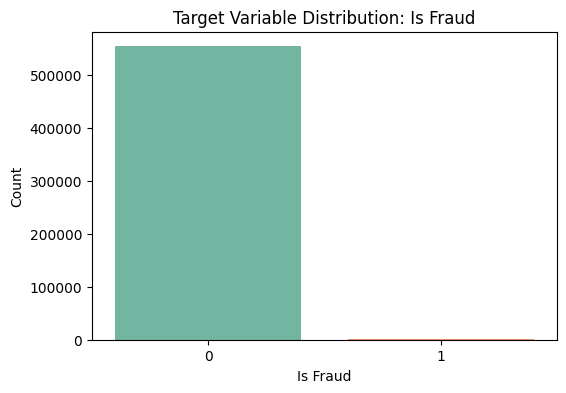


The dataset is imbalanced (majority class > 60%).


In [10]:
## 1. Quality Distribution (Target Variable Analysis)
# Assuming 'is_fraud' is the target variable

# Count and percentage distribution of the target variable
target_counts = train_df['is_fraud'].value_counts()
target_percentages = train_df['is_fraud'].value_counts(normalize=True) * 100

# Print counts and percentages
print("Target Variable Distribution (Counts):")
print(target_counts)
print("\nTarget Variable Distribution (Percentages):")
print(target_percentages)

# Plot distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraud', data=train_df, palette='Set2')
plt.title('Target Variable Distribution: Is Fraud')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

# Check if the dataset is imbalanced or balanced
if target_percentages[0] > 60:
    print("\nThe dataset is imbalanced (majority class > 60%).")
else:
    print("\nThe dataset is relatively balanced.")



In [11]:
## 2. Feature Characteristics

# Summarize types of features
print("\nFeature Types:")
print(train_df.dtypes)

# Numeric Features Summary (min, max, mean, std)
numeric_features = train_df.select_dtypes(include=['number']).columns
print("\nNumeric Feature Summary:")
print(train_df[numeric_features].describe())

# Categorical Features Summary
categorical_features = train_df.select_dtypes(include=['object']).columns
print("\nCategorical Feature Summary:")
for feature in categorical_features:
    print(f"\n{feature} value counts:")
    print(train_df[feature].value_counts())


Feature Types:
Unnamed: 0                        int64
trans_date_trans_time    datetime64[ns]
cc_num                            int64
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                      datetime64[ns]
trans_num                        object
unix_time                datetime64[ns]
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
dtype: object

Numeric Feature Summary:
          Unnamed: 0    

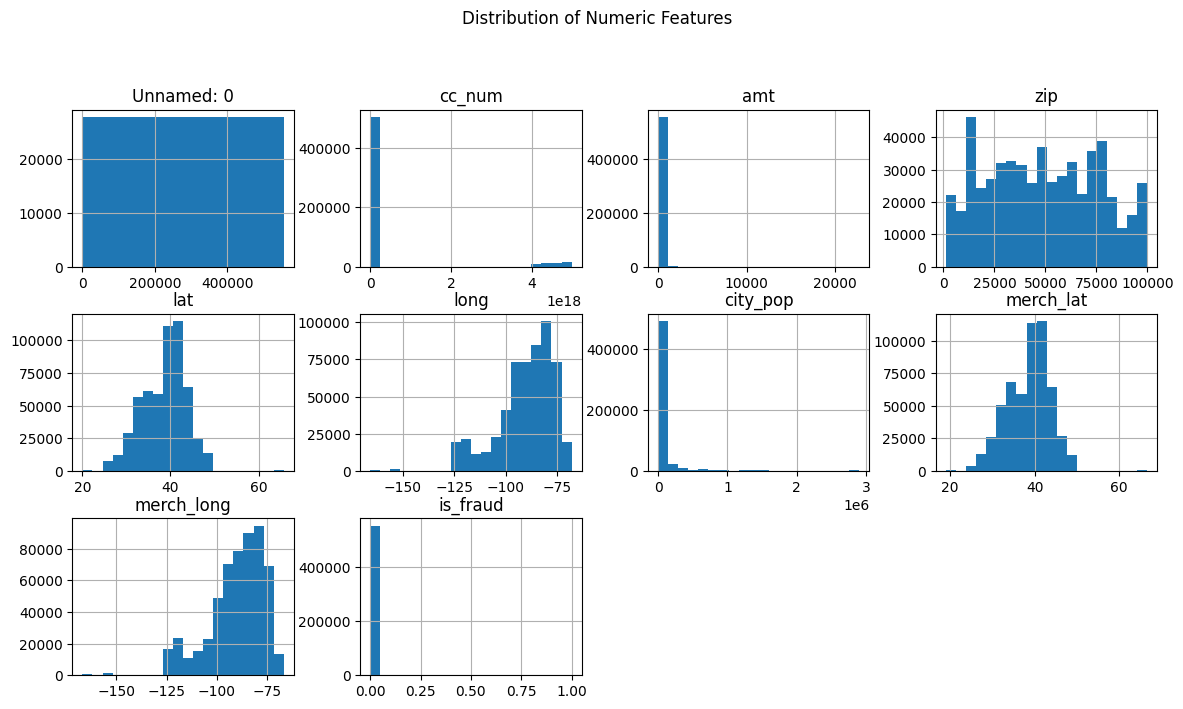

In [12]:


# Plot histograms for numerical features
train_df[numeric_features].hist(bins=20, figsize=(14, 10), layout=(4, 4))
plt.suptitle('Distribution of Numeric Features')
plt.show()



In [13]:
# # Plot count plots for categorical features
# plt.figure(figsize=(14, 10))
# for i, feature in enumerate(categorical_features, 1):
#     plt.subplot(3, 4, i)
#     sns.countplot(x=feature, data=train_df, palette='Set3')
#     plt.title(f'{feature} Distribution')
#     plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

## 3. **Exploratory Data Analysis**

### 3.1 **Feature Distribution Analysis**
   - **Normal Distribution Check**: Identify features that follow a normal distribution.
     - Use histograms, KDE plots, or Q-Q plots.
     - Calculate and report skewness and kurtosis for normality.
   
   - **Skewed Features**: Identify and analyze features with high skewness.
     - List features with skewness above a certain threshold (e.g., >1 or < -1).
     - Discuss possible reasons for skewness (e.g., distribution of residual sugar).

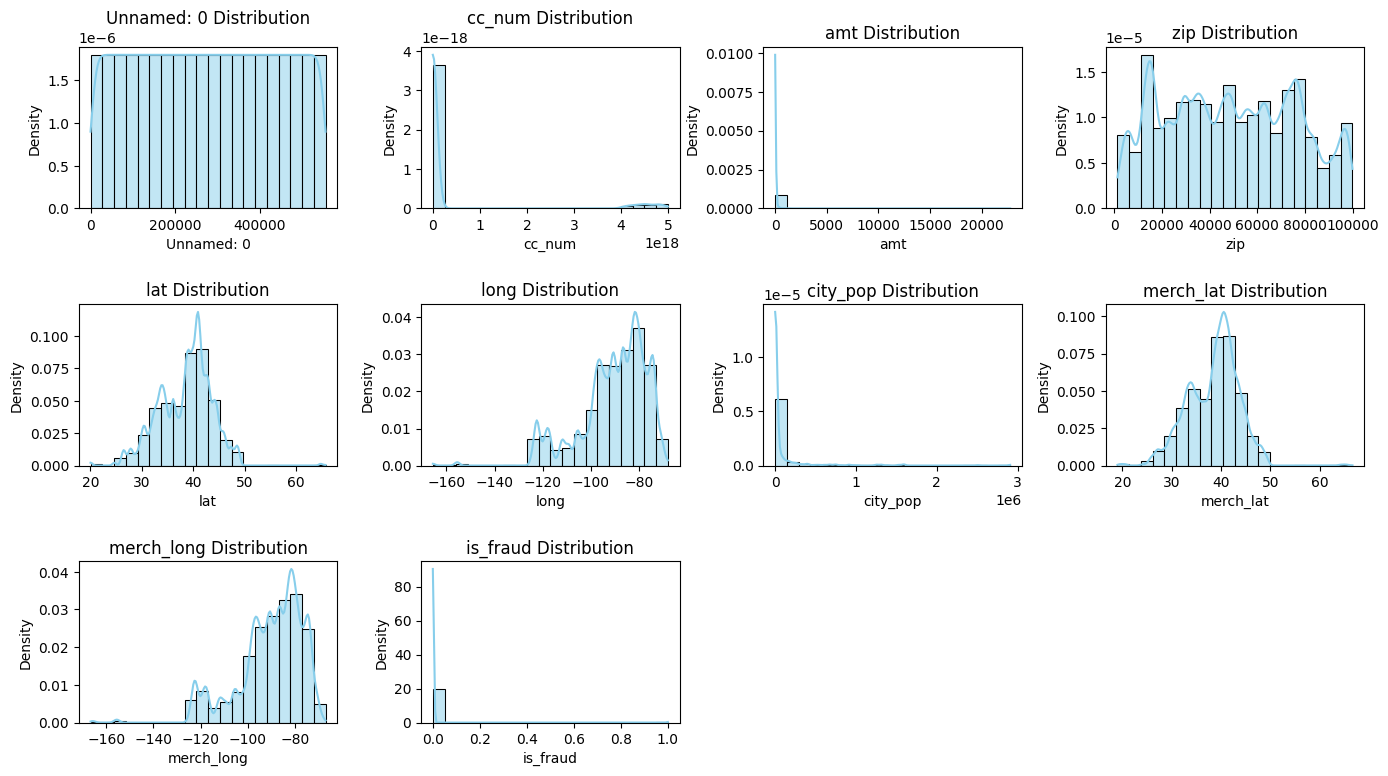

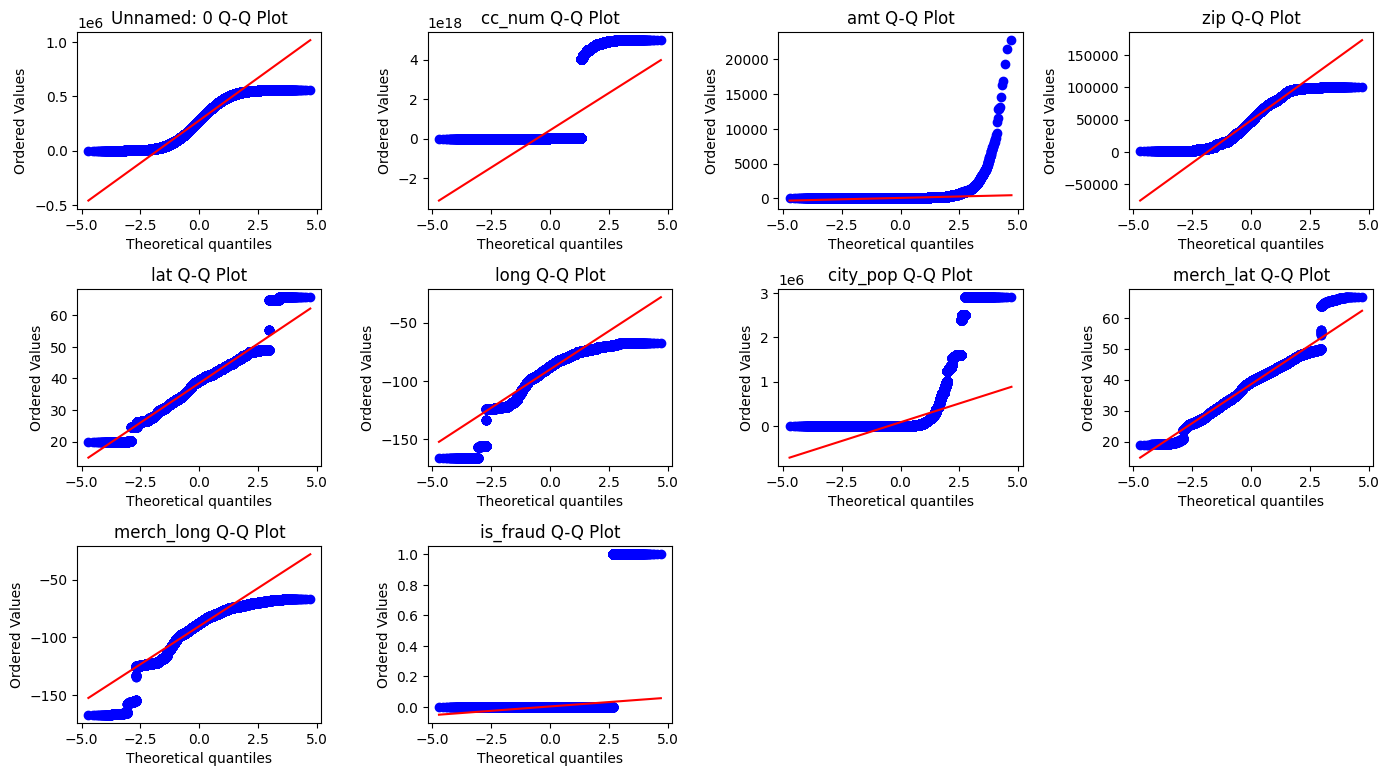

Skewness of Features:
Unnamed: 0   -1.206865e-15
cc_num        2.849204e+00
amt           3.713408e+01
zip           7.724601e-02
lat          -2.060376e-01
long         -1.139416e+00
city_pop      5.583415e+00
merch_lat    -2.026261e-01
merch_long   -1.136810e+00
is_fraud      1.600255e+01
dtype: float64

Kurtosis of Features:
Unnamed: 0      -1.200000
cc_num           6.164717
amt           3247.084023
zip             -1.095128
lat              0.739401
long             1.794261
city_pop        37.470475
merch_lat        0.722898
merch_long       1.790573
is_fraud       254.082629
dtype: float64

Features with High Skewness (|skewness| > 1):
Index(['cc_num', 'amt', 'long', 'city_pop', 'merch_long', 'is_fraud'], dtype='object')


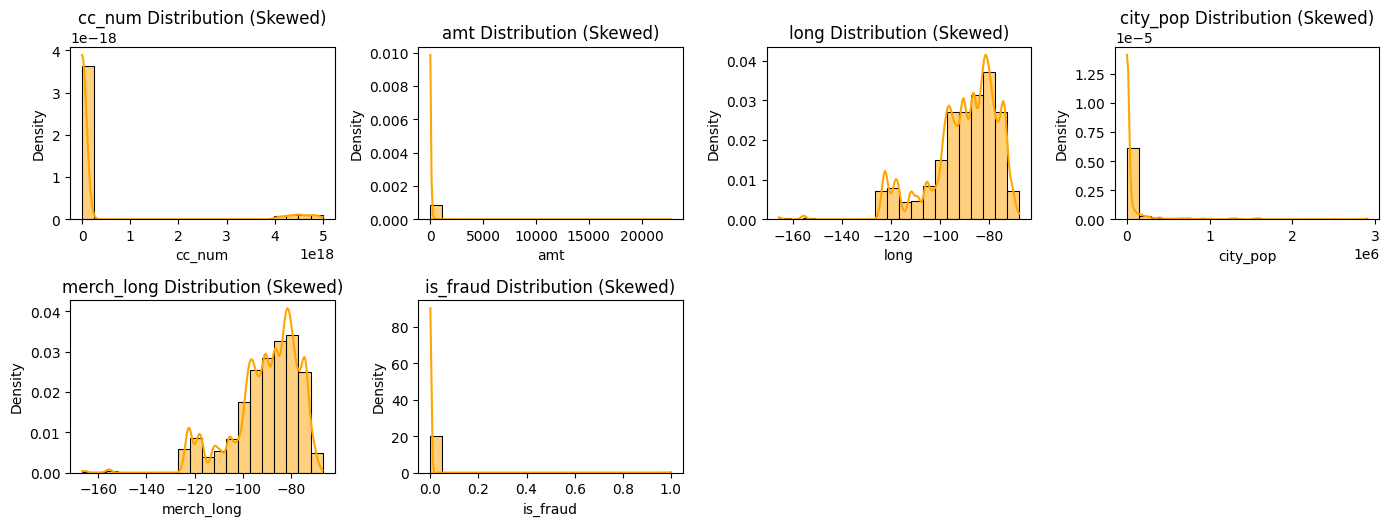

In [14]:
import scipy.stats as stats
import numpy as np

# Assuming the dataset is loaded into a DataFrame named 'train_df'
# train_df = pd.read_csv('your_data.csv')

## 1. Normal Distribution Check (Histograms, KDE plots, Q-Q plots)
# Plot histograms and KDE for numeric features
numeric_features = train_df.select_dtypes(include=['number']).columns

# Plot histograms and KDE plots
plt.figure(figsize=(14, 10))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(4, 4, i)
    sns.histplot(train_df[feature], kde=True, bins=20, color='skyblue', stat='density')
    plt.title(f'{feature} Distribution')
plt.tight_layout()
plt.show()

# Q-Q plots for normality
plt.figure(figsize=(14, 10))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(4, 4, i)
    stats.probplot(train_df[feature].dropna(), dist="norm", plot=plt)
    plt.title(f'{feature} Q-Q Plot')
plt.tight_layout()
plt.show()

## 2. Skewness and Kurtosis for Normality
# Calculate skewness and kurtosis for each numeric feature
skewness = train_df[numeric_features].skew()
kurtosis = train_df[numeric_features].kurt()

# Print skewness and kurtosis values
print("Skewness of Features:")
print(skewness)

print("\nKurtosis of Features:")
print(kurtosis)

## 3. Skewed Features (Skewness > 1 or < -1)
# Identify features with high skewness (skewness > 1 or < -1)
skewed_features = skewness[(skewness > 1) | (skewness < -1)].index

print("\nFeatures with High Skewness (|skewness| > 1):")
print(skewed_features)

# Visualize skewed features (Histogram + KDE plot for skewed features)
plt.figure(figsize=(14, 10))
for i, feature in enumerate(skewed_features, 1):
    plt.subplot(4, 4, i)
    sns.histplot(train_df[feature], kde=True, bins=20, color='orange', stat='density')
    plt.title(f'{feature} Distribution (Skewed)')
plt.tight_layout()
plt.show()



### 3.2 **Correlation Analysis**
   - **Correlation Matrix**: Generate a correlation matrix for numeric features.
     - Highlight features with strong correlations with the target variable (|r| > 0.2).
     - Discuss significant positive and negative correlations.
   
   - **Inter-feature Correlations**: Identify highly correlated features.
     - Discuss possible multicollinearity issues and their potential impact.
   

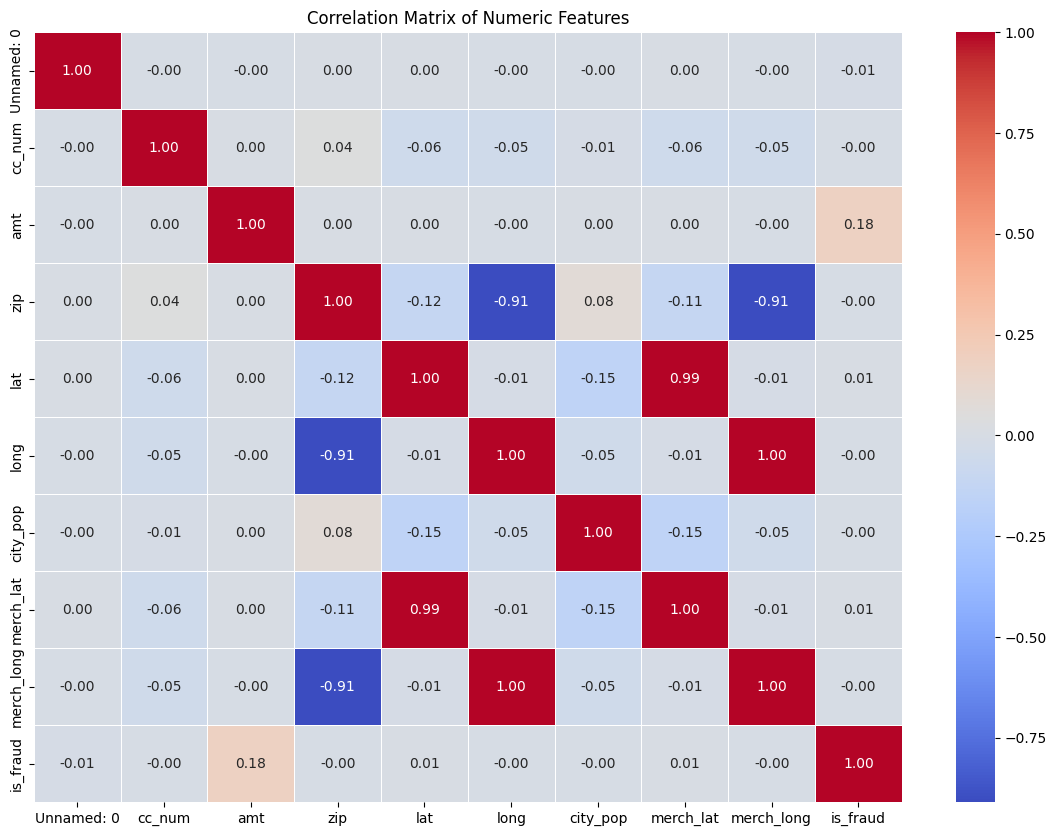


Features with Strong Correlation to Target Variable (|r| > 0.2):
is_fraud    1.0
Name: is_fraud, dtype: float64


/tmp/ipykernel_21022/2027387866.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=strong_corr_with_target.index, y=strong_corr_with_target.values, palette='Set2')


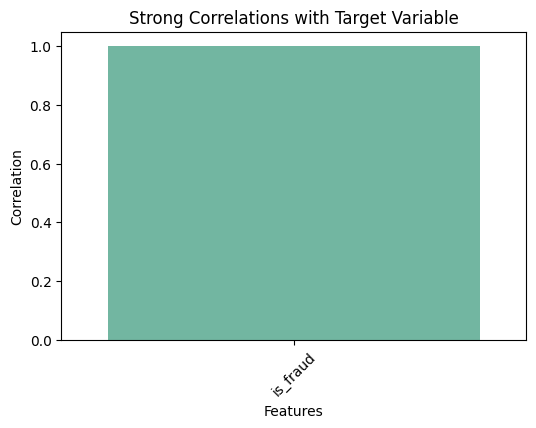


Highly Correlated Feature Pairs (|r| > 0.8):
zip and long: -0.91
zip and merch_long: -0.91
lat and merch_lat: 0.99
long and zip: -0.91
long and merch_long: 1.00
merch_lat and lat: 0.99
merch_long and zip: -0.91
merch_long and long: 1.00

Multicollinearity warning: The features listed above are highly correlated with each other.     This can lead to multicollinearity issues in some machine learning models, especially linear models, where     the coefficients of correlated features can be unstable and difficult to interpret.


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming the dataset is loaded into a DataFrame named 'train_df'
# train_df = pd.read_csv('your_data.csv')

## 1. Correlation Matrix (For Numeric Features)
# Calculate the correlation matrix for numeric features
numeric_features = train_df.select_dtypes(include=['number']).columns
correlation_matrix = train_df[numeric_features].corr()

# Plot the correlation matrix using heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

## 2. Highlighting Strong Correlations with Target Variable (|r| > 0.2)
# Assuming 'is_fraud' is the target variable
target_corr = correlation_matrix['is_fraud'].abs()  # Absolute correlation with target variable
strong_corr_with_target = target_corr[target_corr > 0.2]

print("\nFeatures with Strong Correlation to Target Variable (|r| > 0.2):")
print(strong_corr_with_target)

# Visualize the features with strong correlation to the target variable
plt.figure(figsize=(6, 4))
sns.barplot(x=strong_corr_with_target.index, y=strong_corr_with_target.values, palette='Set2')
plt.title('Strong Correlations with Target Variable')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.show()

## 3. Identifying Inter-feature Correlations (Highly Correlated Features)
# Identify highly correlated features (correlation > 0.8 or < -0.8)
high_corr_features = np.where(np.abs(correlation_matrix) > 0.8)
high_corr_pairs = []

# Loop through the correlation matrix to find high correlations
for i in range(len(high_corr_features[0])):
    if high_corr_features[0][i] != high_corr_features[1][i]:
        feature_1 = correlation_matrix.columns[high_corr_features[0][i]]
        feature_2 = correlation_matrix.columns[high_corr_features[1][i]]
        correlation_value = correlation_matrix.iloc[high_corr_features[0][i], high_corr_features[1][i]]
        high_corr_pairs.append((feature_1, feature_2, correlation_value))

# Print pairs with high correlations
print("\nHighly Correlated Feature Pairs (|r| > 0.8):")
for pair in high_corr_pairs:
    print(f"{pair[0]} and {pair[1]}: {pair[2]:.2f}")

# Discuss potential multicollinearity issues
if len(high_corr_pairs) > 0:
    print("\nMulticollinearity warning: The features listed above are highly correlated with each other. \
    This can lead to multicollinearity issues in some machine learning models, especially linear models, where \
    the coefficients of correlated features can be unstable and difficult to interpret.")


### 3.3 **Outlier Analysis**
   - **Outlier Identification**: Identify outliers using IQR, Z-scores, or boxplots.
     - Mention the number of outliers for each feature and potential impact on modeling.
     - Discuss treatment strategies (e.g., removal, capping).



Number of Outliers Identified Using IQR:
Unnamed: 0: 0 outliers
cc_num: 50982 outliers
amt: 27778 outliers
zip: 0 outliers
lat: 1933 outliers
long: 21104 outliers
city_pop: 104151 outliers
merch_lat: 2090 outliers
merch_long: 17926 outliers
is_fraud: 2145 outliers

Number of Outliers Identified Using Z-scores:
Unnamed: 0: 0 outliers
cc_num: 36551 outliers
amt: 5115 outliers
zip: 0 outliers
lat: 1933 outliers
long: 1933 outliers
city_pop: 14046 outliers
merch_lat: 1933 outliers
merch_long: 1933 outliers
is_fraud: 2145 outliers


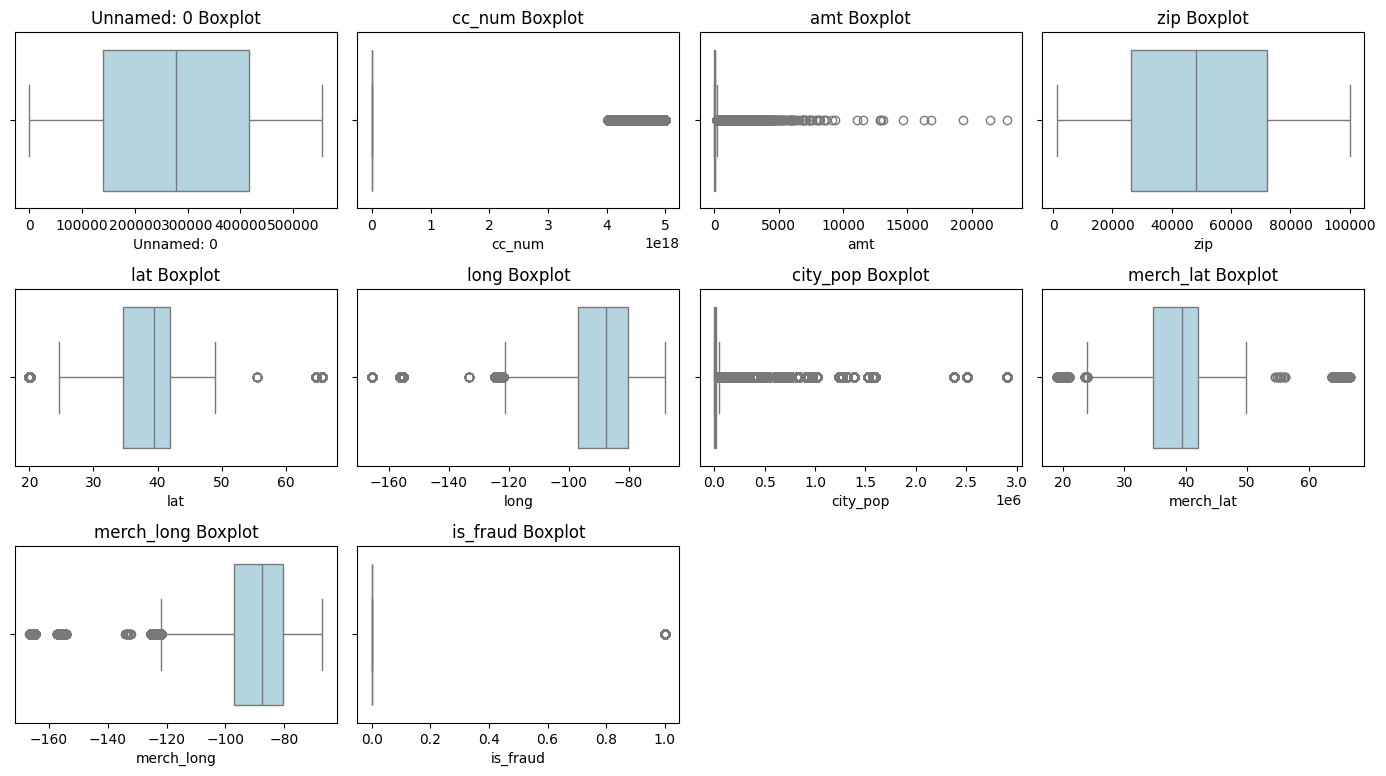

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Assuming the dataset is loaded into a DataFrame named 'train_df'
# train_df = pd.read_csv('your_data.csv')

## 1. Outlier Identification Using IQR (Interquartile Range)
# Calculate IQR for numeric features
numeric_features = train_df.select_dtypes(include=['number']).columns

# Identify outliers based on IQR (Outliers are values outside 1.5 * IQR)
outliers_iqr = {}

for feature in numeric_features:
    Q1 = train_df[feature].quantile(0.25)
    Q3 = train_df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_iqr[feature] = train_df[(train_df[feature] < lower_bound) | (train_df[feature] > upper_bound)].shape[0]

# Display the number of outliers for each feature using IQR
print("\nNumber of Outliers Identified Using IQR:")
for feature, outlier_count in outliers_iqr.items():
    print(f"{feature}: {outlier_count} outliers")

## 2. Outlier Identification Using Z-scores
# Calculate Z-scores for numeric features
z_scores = np.abs(stats.zscore(train_df[numeric_features]))

# Set a threshold for outliers (e.g., Z-score > 3)
outliers_z = {}
for i, feature in enumerate(numeric_features):
    outliers_z[feature] = np.sum(z_scores[:, i] > 3)

# Display the number of outliers for each feature using Z-scores
print("\nNumber of Outliers Identified Using Z-scores:")
for feature, outlier_count in outliers_z.items():
    print(f"{feature}: {outlier_count} outliers")

## 3. Boxplots to Visually Identify Outliers
plt.figure(figsize=(14, 10))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=train_df[feature], color='lightblue')
    plt.title(f'{feature} Boxplot')
plt.tight_layout()
plt.show()

## 4. Discussion on Treatment Strategies and Potential Impact

# For outlier treatment, we generally have a few options:
# 1. Remove outliers (useful if outliers are errors or extremely rare cases).
# 2. Capping (set upper and lower bounds to reduce the effect of extreme outliers).
# 3. Transformations (log, square root) to make the distribution more normal.

# Example: Removing outliers based on IQR
# train_df_cleaned = train_df[(train_df[numeric_features] >= lower_bound) & (train_df[numeric_features] <= upper_bound)]



## 4. **Data Preparation**

### 4.1 **Feature Engineering**
   - **Creating New Features**: Based on insights from EDA, create new features that might improve model performance.
     - Examples could include ratios (e.g., alcohol to density), combined features (e.g., total acidity), or log transformations (for skewed variables).
   
   - **Log Transformations**: Apply log transformations to features with high skewness.
     - Discuss the rationale and impact of transformations on feature distribution and model performance.

In [17]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Assuming the dataset is loaded into a DataFrame named 'train_df'
# # train_df = pd.read_csv('your_data.csv')

# ## 1. Creating New Features

# # Example 1: Creating a ratio feature (e.g., alcohol to density)
# if 'alcohol' in train_df.columns and 'density' in train_df.columns:
#     train_df['alcohol_to_density'] = train_df['alcohol'] / train_df['density']

# # Example 2: Combining features to create a new one (e.g., total acidity)
# if 'citric_acid' in train_df.columns and 'fixed_acidity' in train_df.columns:
#     train_df['total_acidity'] = train_df['citric_acid'] + train_df['fixed_acidity']

# # Example 3: Create an interaction feature (e.g., age * income)
# # Assuming 'age' and 'income' exist in the dataset
# if 'age' in train_df.columns and 'income' in train_df.columns:
#     train_df['age_income_interaction'] = train_df['age'] * train_df['income']

# # Display the new features added
# print("New Features Created:")
# print(train_df[['alcohol_to_density', 'total_acidity', 'age_income_interaction']].head())

# ## 2. Log Transformations for Skewed Features

# # Identify numeric features with high skewness
# numeric_features = train_df.select_dtypes(include=['number']).columns
# skewness = train_df[numeric_features].skew()

# # Identify features with high skewness (greater than 1 or less than -1)
# skewed_features = skewness[abs(skewness) > 1].index

# # Apply log transformation to skewed features
# for feature in skewed_features:
#     # Apply log transformation (adding a small constant to avoid log(0) issues)
#     train_df[f'{feature}_log'] = np.log1p(train_df[feature])

# # Display the log-transformed features
# print("\nLog Transformed Features:")
# print(train_df[[f'{feature}_log' for feature in skewed_features]].head())

# ## 3. Visualizing the Impact of Log Transformation

# # Visualize skewness before and after log transformation
# plt.figure(figsize=(14, 6))

# # Plot the distribution of original and log-transformed skewed features
# for i, feature in enumerate(skewed_features, 1):
#     plt.subplot(2, len(skewed_features), i)
#     sns.histplot(train_df[feature], kde=True, color='blue', bins=20)
#     plt.title(f'{feature} - Original')

#     plt.subplot(2, len(skewed_features), len(skewed_features) + i)
#     sns.histplot(train_df[f'{feature}_log'], kde=True, color='green', bins=20)
#     plt.title(f'{feature}_log - Transformed')

# plt.tight_layout()
# plt.show()



### 4.2 **Feature Selection**
   - **Correlation-based Selection**: Remove highly correlated features or use dimensionality reduction methods like PCA.
   - **Variance Inflation Factor (VIF)**: Calculate VIF to assess multicollinearity.
   - **Feature Importance**: Preliminary assessment using models like Random Forest to rank feature importance.


In [33]:
print(numeric_features.tolist() + categorical_features.tolist())
print()
training_features = (numeric_features.tolist() + categorical_features.tolist())[1:]
training_features

['Unnamed: 0', 'cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'is_fraud', 'merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job', 'trans_num']



['cc_num',
 'amt',
 'zip',
 'lat',
 'long',
 'city_pop',
 'merch_lat',
 'merch_long',
 'is_fraud',
 'merchant',
 'category',
 'first',
 'last',
 'gender',
 'street',
 'city',
 'state',
 'job',
 'trans_num']

In [43]:
train_df[training_features].head()

,cc_num,amt,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud,merchant,category,first,last,gender,street,city,state,job,trans_num
0,2291163933867244,2.86,29209,33.9659,-80.9355,333497,33.986391,-81.200714,0,fraud_Kirlin and Sons,personal_care,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,Mechanical engineer,2da90c7d74bd46a0caf3777415b3ebd3
1,3573030041201292,29.84,84002,40.3207,-110.4360,302,39.450498,-109.960431,0,fraud_Sporer-Keebler,personal_care,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,"Sales professional, IT",324cc204407e99f51b0d6ca0055005e7
2,3598215285024754,41.28,11710,40.6729,-73.5365,34496,40.495810,-74.196111,0,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,"Librarian, public",c81755dbbbea9d5c77f094348a7579be
3,3591919803438423,60.05,32780,28.5697,-80.8191,54767,28.812398,-80.883061,0,fraud_Haley Group,misc_pos,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,Set designer,2159175b9efe66dc301f149d3d5abf8c
4,3526826139003047,3.19,49632,44.2529,-85.0170,1126,44.959148,-85.884734,0,fraud_Johnston-Casper,travel,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,Furniture designer,57ff021bd3f328f8738bb535c302a31b


In [39]:
train_df['merchant'].nunique(), len(train_df)

(693, 555719)

In [ ]:
# from sklearn.preprocessing import OneHotEncoder

In [ ]:
# # One-hot encoding
# encoder = OneHotEncoder(sparse=False)
# encoded = encoder.fit_transform(df[['merchant']])

# # Convert to DataFrame
# # encoded_df = 
# pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['merchant']))


In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Assuming the dataset is loaded into a DataFrame named 'train_df'
# train_df = pd.read_csv('your_data.csv')

## 1. Correlation-based Feature Selection

# Calculate correlation matrix
numeric_features = train_df.select_dtypes(include=['number']).columns
correlation_matrix = train_df[numeric_features].corr()

# Identify highly correlated features (correlation > 0.8)
highly_corr_features = np.where(np.abs(correlation_matrix) > 0.8)
high_corr_pairs = []

for i in range(len(highly_corr_features[0])):
    if highly_corr_features[0][i] != highly_corr_features[1][i]:
        feature_1 = correlation_matrix.columns[highly_corr_features[0][i]]
        feature_2 = correlation_matrix.columns[highly_corr_features[1][i]]
        correlation_value = correlation_matrix.iloc[highly_corr_features[0][i], highly_corr_features[1][i]]
        high_corr_pairs.append((feature_1, feature_2, correlation_value))

# Display pairs of features with correlation > 0.8
print("\nHighly Correlated Feature Pairs (|r| > 0.8):")
for pair in high_corr_pairs:
    print(f"{pair[0]} and {pair[1]}: {pair[2]:.2f}")

# You can drop one feature from each highly correlated pair or apply PCA for dimensionality reduction

## 2. Variance Inflation Factor (VIF)
# Calculate VIF for each feature to assess multicollinearity
X = train_df[numeric_features]
X = add_constant(X)  # Add constant for intercept term
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF values
print("\nVariance Inflation Factor (VIF) Values:")
print(vif_data)

# Features with VIF > 10 should be considered for removal due to high multicollinearity.




Highly Correlated Feature Pairs (|r| > 0.8):
zip and long: -0.91
zip and merch_long: -0.91
lat and merch_lat: 0.99
long and zip: -0.91
long and merch_long: 1.00
merch_lat and lat: 0.99
merch_long and zip: -0.91
merch_long and long: 1.00


/run/media/shiv/e202b7b3-865c-4d22-9196-f1c9deb5d5f2/code/fraud-detection/venv/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss



Variance Inflation Factor (VIF) Values:
       Feature       VIF
0        const  0.000000
1   Unnamed: 0  0.594844
2       cc_num  1.006903
3          amt  0.974514
4          zip  0.571896
5          lat  0.107190
6         long  0.289831
7     city_pop  1.002357
8    merch_lat  0.108483
9   merch_long  0.290150
10    is_fraud  0.999090


In [45]:

# ## 3. Feature Importance using Random Forest
# # Use Random Forest to assess feature importance
# # Assuming the target variable is 'is_fraud'
# X_train = train_df[training_features]  # Features
# y_train = train_df['is_fraud']  # Target

# print()
# print(X_train.head(), y_train.head())
# print()

# # Train a Random Forest Classifier
# rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_model.fit(X_train, y_train)

# # Get feature importances
# feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_model.feature_importances_})
# feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# # Display feature importances
# print("\nFeature Importance from Random Forest:")
# print(feature_importances)

# # Visualizing the feature importance
# plt.figure(figsize=(12, 6))
# sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
# plt.title('Feature Importance (Random Forest)')
# plt.show()



Feature Importance from Random Forest:
                                          Feature    Importance
1                                             amt  3.303144e-01
7                                      merch_long  8.452256e-02
6                                       merch_lat  8.424558e-02
4                                            long  4.423246e-02
2                                             zip  4.408482e-02
..                                            ...           ...
586                    merchant_fraud_Shields Inc  1.544737e-06
447  merchant_fraud_Morissette, Weber and Wiegand  1.429156e-06
672                   merchant_fraud_Wiegand-Lowe  1.017026e-06
250                 merchant_fraud_Heller-Abshire  8.001130e-07
338   merchant_fraud_Kohler, Lindgren and Koelpin  7.073127e-07

[767 rows x 2 columns]


/tmp/ipykernel_21022/2136349258.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


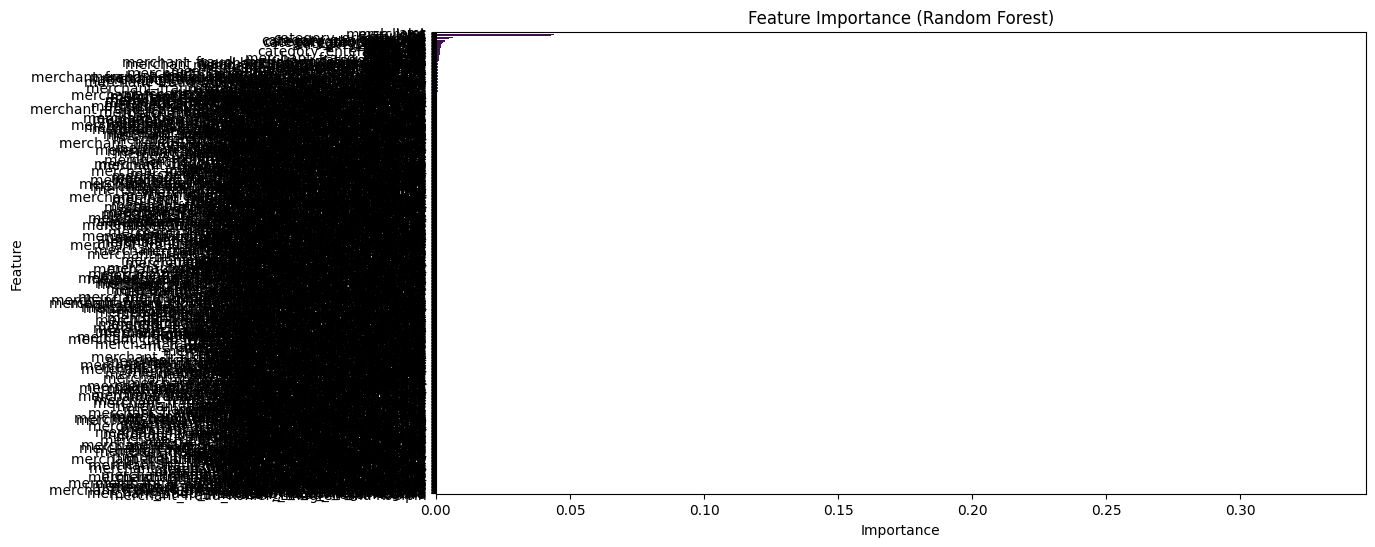

In [46]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import seaborn as sns
import matplotlib.pyplot as plt

# Load data (assuming it's in train_df)
# train_df = pd.read_csv("your_file.csv")

# Separate features and target
training_features = ['cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 
                     'merch_lat', 'merch_long', 'merchant', 'category', 
                     'gender', 'state']
target_column = 'is_fraud'

X = train_df[training_features]
y = train_df[target_column]

# Preprocessing: One-Hot Encode Categorical Features
categorical_features = ['merchant', 'category', 'gender', 'state']
numerical_features = ['cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_names = (numerical_features + 
                 list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)))
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display feature importances
print("\nFeature Importance from Random Forest:")
print(feature_importances)

# Visualizing the feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Feature Importance (Random Forest)')
plt.show()


### 4.3 **Data Splitting Strategy**
   - **Training Set (60%)**: Use this set for model training.
   - **Validation Set (20%)**: For model tuning and selection.
   - **Test Set (20%)**: For final evaluation and unbiased assessment.


In [47]:
from sklearn.model_selection import train_test_split

# Assuming the dataset is loaded into a DataFrame named 'train_df'
# Target variable is 'is_fraud', and the rest are features

# Split features and target variable
# X = train_df.drop(columns=['is_fraud','trans_date_trans_time','dob', 'unix_time'])  # Features
categorical_features = ['merchant', 'category', 'gender', 'state']
numerical_features = ['cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']

X = train_df[numerical_features]  # Features
y = train_df['is_fraud']  # Target variable

# Step 1: Split the data into Training (60%) and Remaining (40%) Set
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Step 2: Split the Remaining Set into Validation (50% of 40%) and Test (50% of 40%) Set
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Display the shape of the splits to confirm the data splitting
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Validation set size: {X_valid.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")



Training set size: 333431 samples
Validation set size: 111144 samples
Test set size: 111144 samples


## 5. **Model Development**

### 5.1 **Regression Approach (if applicable)**
   - **Baseline Model**: Implement a simple linear regression model.
     - Evaluate performance using RMSE, R², and MAE.
   
   - **Regularized Models**: Use Ridge and Lasso regression to reduce overfitting.
     - Compare performance metrics (e.g., RMSE, R²).

   - **Advanced Models**: Implement more complex models like XGBoost or Decision Trees.
     - Perform hyperparameter tuning and evaluate results.

In [49]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor

# Split the dataset into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Calculate performance metrics
    rmse_train = root_mean_squared_error(y_train, y_pred_train)
    rmse_test = root_mean_squared_error(y_test, y_pred_test)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    # Display results
    print(f"\nModel: {model.__class__.__name__}")
    print(f"Training RMSE: {rmse_train:.3f}")
    print(f"Test RMSE: {rmse_test:.3f}")
    print(f"Training MAE: {mae_train:.3f}")
    print(f"Test MAE: {mae_test:.3f}")
    print(f"Training R²: {r2_train:.3f}")
    print(f"Test R²: {r2_test:.3f}")

# 1. Baseline Model: Simple Linear Regression
print("\n--- Baseline Model: Linear Regression ---")
linear_regressor = LinearRegression()
evaluate_model(linear_regressor, X_train, y_train, X_test, y_test)

# 2. Regularized Models: Ridge and Lasso Regression
print("\n--- Regularized Model: Ridge Regression ---")
ridge_regressor = Ridge(alpha=1.0)  # Regularization strength (adjust alpha to tune the model)
evaluate_model(ridge_regressor, X_train, y_train, X_test, y_test)

print("\n--- Regularized Model: Lasso Regression ---")
lasso_regressor = Lasso(alpha=0.1)  # Regularization strength (adjust alpha to tune the model)
evaluate_model(lasso_regressor, X_train, y_train, X_test, y_test)

# 3. Advanced Models: XGBoost and Decision Trees
# XGBoost Model
print("\n--- Advanced Model: XGBoost ---")
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
evaluate_model(xgb_model, X_train, y_train, X_test, y_test)

# Decision Tree Regressor Model
print("\n--- Advanced Model: Decision Tree Regressor ---")
dt_model = DecisionTreeRegressor(random_state=42)
evaluate_model(dt_model, X_train, y_train, X_test, y_test)




--- Baseline Model: Linear Regression ---

Model: LinearRegression
Training RMSE: 0.062
Test RMSE: 0.062
Training MAE: 0.008
Test MAE: 0.008
Training R²: 0.000
Test R²: -0.000

--- Regularized Model: Ridge Regression ---


/run/media/shiv/e202b7b3-865c-4d22-9196-f1c9deb5d5f2/code/fraud-detection/venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=9.58955e-38): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Model: Ridge
Training RMSE: 0.061
Test RMSE: 0.061
Training MAE: 0.008
Test MAE: 0.008
Training R²: 0.035
Test R²: 0.033

--- Regularized Model: Lasso Regression ---


/run/media/shiv/e202b7b3-865c-4d22-9196-f1c9deb5d5f2/code/fraud-detection/venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.978e+02, tolerance: 1.279e-01
  model = cd_fast.enet_coordinate_descent(



Model: Lasso
Training RMSE: 0.061
Test RMSE: 0.061
Training MAE: 0.008
Test MAE: 0.008
Training R²: 0.035
Test R²: 0.033

--- Advanced Model: XGBoost ---

Model: XGBRegressor
Training RMSE: 0.040
Test RMSE: 0.053
Training MAE: 0.005
Test MAE: 0.006
Training R²: 0.591
Test R²: 0.287

--- Advanced Model: Decision Tree Regressor ---

Model: DecisionTreeRegressor
Training RMSE: 0.000
Test RMSE: 0.070
Training MAE: 0.000
Test MAE: 0.005
Training R²: 1.000
Test R²: -0.277



### 5.2 **Classification Approach (if applicable)**
   - **Baseline Classifier**: Implement Logistic Regression as a baseline.
     - Evaluate accuracy, F1-score, and cross-validation stability.
   
   - **Random Forest and XGBoost**: Evaluate these models for classification tasks.
     - Analyze class-wise performance using AUC, Precision, Recall, and F1-score.
     - Discuss confusion matrices and misclassification rates.



--- Baseline Classifier: Logistic Regression ---


/run/media/shiv/e202b7b3-865c-4d22-9196-f1c9deb5d5f2/code/fraud-detection/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/run/media/shiv/e202b7b3-865c-4d22-9196-f1c9deb5d5f2/code/fraud-detection/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Model: LogisticRegression
Training Accuracy: 0.996
Test Accuracy: 0.996
Training F1-Score: 0.000
Test F1-Score: 0.000
Training Precision: 0.000
Test Precision: 0.000
Training Recall: 0.000
Test Recall: 0.000
Training AUC: 0.523
Test AUC: 0.535


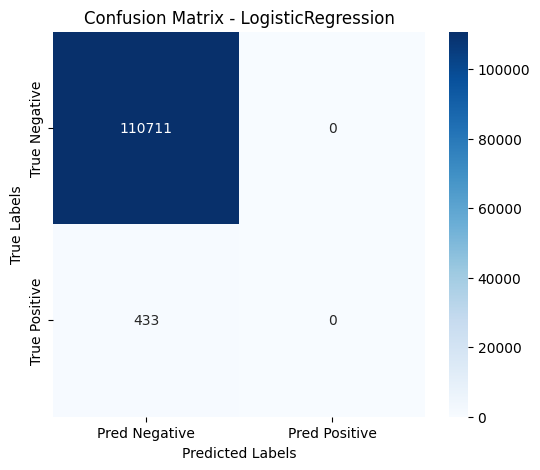


--- Random Forest Classifier ---

Model: RandomForestClassifier
Training Accuracy: 1.000
Test Accuracy: 0.997
Training F1-Score: 1.000
Test F1-Score: 0.495
Training Precision: 1.000
Test Precision: 0.751
Training Recall: 1.000
Test Recall: 0.370
Training AUC: 1.000
Test AUC: 0.910


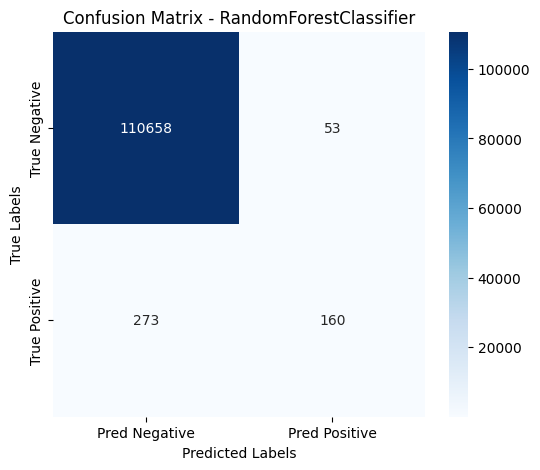


--- XGBoost Classifier ---

Model: XGBClassifier
Training Accuracy: 0.998
Test Accuracy: 0.997
Training F1-Score: 0.670
Test F1-Score: 0.420
Training Precision: 0.908
Test Precision: 0.636
Training Recall: 0.531
Test Recall: 0.314
Training AUC: 0.998
Test AUC: 0.982


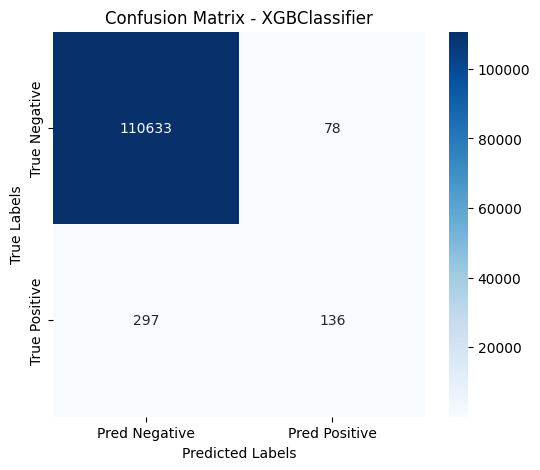

In [50]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Function to evaluate classifiers
def evaluate_classifier(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Calculate classification metrics
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    f1_train = f1_score(y_train, y_pred_train)
    f1_test = f1_score(y_test, y_pred_test)
    precision_train = precision_score(y_train, y_pred_train)
    precision_test = precision_score(y_test, y_pred_test)
    recall_train = recall_score(y_train, y_pred_train)
    recall_test = recall_score(y_test, y_pred_test)
    auc_train = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
    auc_test = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    cm = confusion_matrix(y_test, y_pred_test)

    # Display results
    print(f"\nModel: {model.__class__.__name__}")
    print(f"Training Accuracy: {accuracy_train:.3f}")
    print(f"Test Accuracy: {accuracy_test:.3f}")
    print(f"Training F1-Score: {f1_train:.3f}")
    print(f"Test F1-Score: {f1_test:.3f}")
    print(f"Training Precision: {precision_train:.3f}")
    print(f"Test Precision: {precision_test:.3f}")
    print(f"Training Recall: {recall_train:.3f}")
    print(f"Test Recall: {recall_test:.3f}")
    print(f"Training AUC: {auc_train:.3f}")
    print(f"Test AUC: {auc_test:.3f}")
    
    # Confusion Matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred Negative', 'Pred Positive'], yticklabels=['True Negative', 'True Positive'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix - {model.__class__.__name__}')
    plt.show()

# 1. Baseline Model: Logistic Regression
print("\n--- Baseline Classifier: Logistic Regression ---")
log_reg = LogisticRegression(max_iter=1000)
evaluate_classifier(log_reg, X_train, y_train, X_test, y_test)

# 2. Random Forest Classifier
print("\n--- Random Forest Classifier ---")
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
evaluate_classifier(rf_classifier, X_train, y_train, X_test, y_test)

# 3. XGBoost Classifier
print("\n--- XGBoost Classifier ---")
xgb_classifier = xgb.XGBClassifier(n_estimators=100, random_state=42)
evaluate_classifier(xgb_classifier, X_train, y_train, X_test, y_test)


## 6. **Model Evaluation**

### 6.1 **Performance Metrics**
   - **Accuracy**: Overall accuracy of the model.
   - **Precision, Recall, F1-score**: For each class, analyze model performance.
   - **Cohen's Kappa**: Measure agreement between predicted and actual values.
   - **AUC (Area Under the Curve)**: For classification problems.



Model Performance Metrics:
Accuracy: 0.997
Precision: 0.751
Recall: 0.370
F1-Score: 0.495
Cohen's Kappa: 0.494
AUC: 0.910


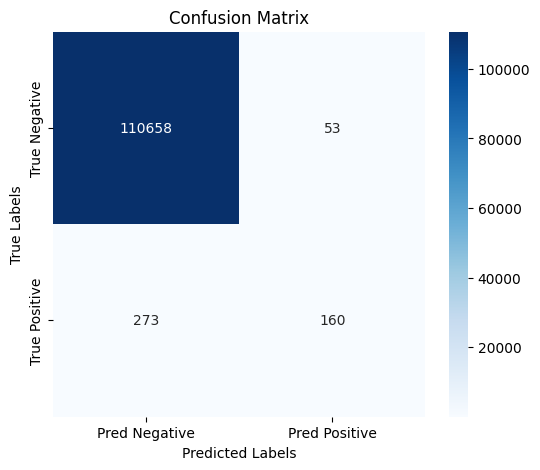


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110711
           1       0.75      0.37      0.50       433

    accuracy                           1.00    111144
   macro avg       0.87      0.68      0.75    111144
weighted avg       1.00      1.00      1.00    111144



In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Function to calculate performance metrics
def evaluate_performance_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Precision, Recall, F1-Score (for each class)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Cohen's Kappa
    kappa = cohen_kappa_score(y_test, y_pred)
    
    # AUC (Area Under the Curve)
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])  # Assuming binary classification

    # Displaying the performance metrics
    print(f"\nModel Performance Metrics:")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1-Score: {f1:.3f}")
    print(f"Cohen's Kappa: {kappa:.3f}")
    print(f"AUC: {auc:.3f}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred Negative', 'Pred Positive'], yticklabels=['True Negative', 'True Positive'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title("Confusion Matrix")
    plt.show()
    
    # Classification Report (Precision, Recall, F1-Score for each class)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Example usage with a classifier (e.g., Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
evaluate_performance_metrics(model, X_test, y_test)


### 6.2 **Error Analysis**
   - **Misclassification Patterns**: Identify common misclassifications and their causes.
   - **Error Distribution**: Examine the nature of errors (e.g., most errors are within one class, or major shifts between classes).


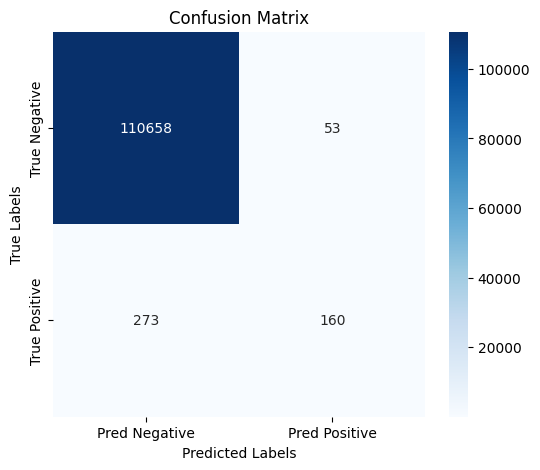


Number of misclassified instances: 326/111144
                     cc_num     amt    zip      lat      long  city_pop  \
1891       3524574586339330   22.55  32960  27.6330  -80.4031    105638   
290084     6597248210463122  637.33  50598  43.0261  -94.4064       912   
137946      343819048608995   21.70  50312  41.5855  -93.6719    222785   
464284  4560395181594436016   19.45  95453  39.0470 -122.9328     11256   
18142      3573386445588324  667.17  57426  45.7205  -98.5534        63   

        merch_lat  merch_long  True Label  Predicted Label  
1891    28.396402  -80.819469           1                0  
290084  42.663504  -94.724860           1                0  
137946  42.366847  -92.708153           1                0  
464284  39.251880 -122.490946           1                0  
18142   46.040300  -97.710460           1                0  


/tmp/ipykernel_21022/2300142398.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  misclassified['True Label'] = y_test[y_test != y_pred]
/tmp/ipykernel_21022/2300142398.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  misclassified['Predicted Label'] = y_pred[y_test != y_pred]


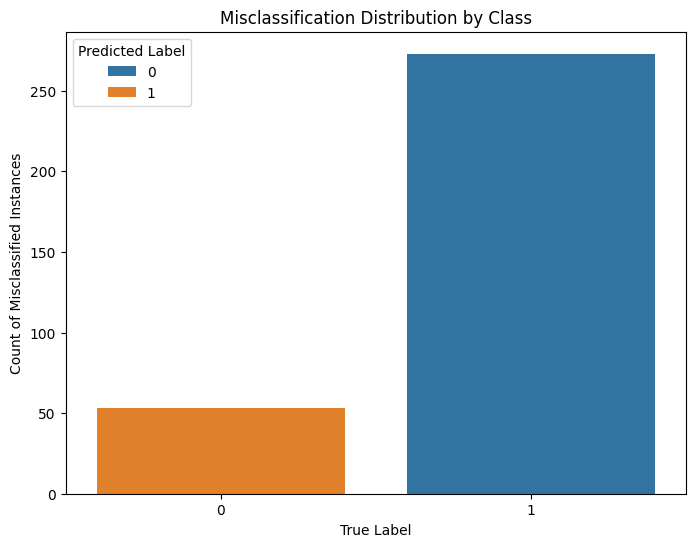

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Function to analyze misclassifications
def error_analysis(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Confusion matrix heatmap
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred Negative', 'Pred Positive'], yticklabels=['True Negative', 'True Positive'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title("Confusion Matrix")
    plt.show()

    # Misclassified instances
    misclassified = X_test[y_test != y_pred]
    misclassified['True Label'] = y_test[y_test != y_pred]
    misclassified['Predicted Label'] = y_pred[y_test != y_pred]
    
    print(f"\nNumber of misclassified instances:    {len(misclassified)}")
    print(f"\nMisclassified ratio:                  {len(misclassified)}/{len(y_test)}")
    print(f"\nMisclassified percentage:             {100*len(misclassified)/len(y_test)}")
    print(misclassified.head())
    
    # Class-wise Error Distribution (Visualizing the errors)
    plt.figure(figsize=(8, 6))
    sns.countplot(x='True Label', data=misclassified, hue='Predicted Label')
    plt.title("Misclassification Distribution by Class")
    plt.xlabel("True Label")
    plt.ylabel("Count of Misclassified Instances")
    plt.show()

# Example usage with a classifier (e.g., Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
error_analysis(model, X_test, y_test)


## 7. **Model Implementation**

### 7.1 **Model Serialization**
   - **Save Model**: Serialize the trained model for future use (e.g., using `Pickle`).
   - **Versioning**: Ensure that model versions are tracked.


### 7.2 **API Development** (for deployment)
   - **Create REST API**: Using frameworks like Flask or FastAPI.
   - **Endpoints**:
     - `/predict`: Accepts feature input and returns a prediction.
     - `/ping`: To check if the model is running.

   - **JSON Request/Response Format**:
     - Example request and response formats, along with error handling.


### 7.3 **Testing and Validation**
   - **Unit and Integration Tests**: Ensure model stability and performance under various conditions.
   - **Load Testing**: Simulate real-world loads and ensure system performance.


## 8. **Model Test Predictions Analysis**

### 8.1 **Test Setup**
   - **Validate with Different Profiles**: Use test data to assess model's generalization across various profiles.
   - **Class Probabilities**: Analyze the predicted class probabilities for different inputs.


### 8.2 **Test Results Analysis**
   - **High-Confidence Predictions**: Where the model shows strong confidence.
   - **Moderate-Confidence Predictions**: Where the model has mixed certainty between classes.
   - **Insights**: Understand patterns of model behavior and its application in real-worl

### **Key Insights**
1. **Confidence Levels**: Evaluate how the model’s confidence correlates with performance.
2. **Classification Patterns**: Understand the model’s decision boundaries and feature impacts.
3. **Feature Importance Validation**: Ensure that important features are aligned with domain knowledge and prediction patterns.
